In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from scipy.stats import entropy
import pickle

In [2]:
completo = pd.read_csv("Datos_completos.csv")
completo

,index,Documento_Ingreso,Documento_Actual,Codigo,Apellido_1_Estudiante,Apellido_2_Estudiante,Nombres_Estudiante,Acceso,Subacceso,Correo_Institucional,...,Corte_3p,Nota_4to_Corte,Corte_4p,Nota_5to_Corte,Corte_5p,Nombre_completo,Correo,Grupo,usuario,Nota_final
0,0,221123,44867,751433,-,-,alcjobxj,Nuevo al programa,Bachillerato con Examen de Estado,alcjobxj@urosario.edu.co,...,20,3.7,15,4.0,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,3.855
1,1,166515,40599,749859,-,-,orhawgyi,Termino condición doble programa,GENERAL,orhawgyi@urosario.edu.co,...,20,3.5,15,3.5,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,3.820
2,2,133161,98669,31366,-,-,mdfaizgp,Doble Programa,GENERAL,mdfaizgp@urosario.edu.co,...,20,3.9,15,3.6,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,4.225
3,3,164862,25568,111363,-,-,mwuaqnnz,Extranjero,GENERAL,mwuaqnnz@urosario.edu.co,...,20,3.5,15,3.8,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,3.575
4,4,879672,73231,667248,-,-,pgooxicb,Doble Programa,Departamento de Admisiones,pgooxicb@urosario.edu.co,...,20,2.6,15,2.7,25,Norma Sarmiento,norma.sarmiento@urosario.edu.co,1,norma.sarmiento,2.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1315,515977,27417,126984,-,-,jnkgwinp,Extranjero,GENERAL,jnkgwinp@urosario.edu.co,...,20,2.6,15,2.4,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.230
1250,1316,989769,86022,706697,-,-,llnuonlp,Reingreso por Fortalecimiento académico,GENERAL,llnuonlp@urosario.edu.co,...,20,3.1,15,2.2,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.755
1251,1317,480565,94961,29130,-,-,xrszqdqk,Termino condición doble programa,Departamento de Admisiones,xrszqdqk@urosario.edu.co,...,20,2.5,15,2.4,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.695
1252,1318,43699,8785,130825,-,-,tskxxthh,Termino condición doble programa,Departamento de Admisiones,tskxxthh@urosario.edu.co,...,20,2.7,15,2.6,25,Lazaro Ramirez,lazaro.ramirez@urosario.edu.co,1,lazaro.ramirez,2.655


%%latex
\usepackage{amsmath,amssymb,amsfonts}



### Tareas
1. Leer paper https://reader.elsevier.com/reader/sd/pii/S0360131516301634?token=DB86640804CC9FE6B7FB5B1D080396823D2094FD36E393FA33E1D62F8CCB331555272C9D164BCAFA28296E5B1C692630
2. Ver cada uno sus modelos teoricos (Escribirlos aca en latex en español), y despues aplicarlo a la base de datos completos (Hecho)
3. Reunion Lunes para explicarle al otro los modelos y la aplicación (Hecho)
4. Hacer modelo por cada materia y si es posible que dependa de las notas obtenidas anteriormente en las pre-requisito.(En proceso)
5. Generar distribución notas a partir de la base de datos de notas (No es necesario, y termina siendo muy complicado- YA NO)
6. Sacar $F_{1.5}$, medidas precision (Hecho)
7. Ver como se pueden hacer los modelos Ensemble.
8. Generar un modelo por cada materia.
9. Grabar satisfactoriamente todos los modelos, y que se puedan cargar y retroalimentar con nuevos datos.

Preguntas:
2. Hasta que corte seria ideal la alerta


Ruiz : K-Nearest, Decision Tree
Miguel : Regresion Logistica y Clasificador bayesiano

## Notas Paper Miguel

* Que el estudiante sepa del modelo predictivo podria considerarse malo, ya que él podria creer que sus notas futuras ya estan predichas por el modelo. Luego seria ideal que solo lo supiera el administrador
* Utilizaron tres notas de examenes como indicadores del performance durante el semestre. Asi como el GPA acumulativo fue tenido en cuenta y las notas en las materias pre-requisito de la materia.
* Las primeras notas del semestre tienden a ser muy buenas predictoras de como van a ser el rendimiento del estudiante de la materia
* Plantean que es mejor crear un modelo por cada materia que uno generalizado
* Recomiendan este libro para ver los metodos: "Principle of Data Mining,D.J. Hand, H. Mannila and P. Smyth MIT press, New York (2001)", Link : https://www.researchgate.net/publication/220688376_Principles_of_Data_Mining (Se ve como bueno)
* Calculan la precisión del modelo de los que pasaron con los que no, para encontrar un mejor modelo que prediga mejor a los malos. Si fueran unidos podria que un modelo diera menos errores en general pero que falle muchisimo en los malos estudiantes , lo cual seria un problema. Tambien calcularon un $F_{1.5}$ puntaje que le da mas peso a los estudiantes que fallaron que los que pasaron.
* Utilizaron el coeficiente de Pearson para saber que tan corelacionadas estaban las variables explicativas, si pasaba de 0,3 las escogian. (Podriamos hacer eso)
* Parece que es necesario acotar el numero de estudiantes de los datos de entrenamiento, para que el modelo no se descarrile. (Recordad base Juan F el numero de notas varia mucho).
* Falso negativo : No identificar estudiantes que se encontraban en riesgo.
* Termina siendo mejor haciendo un modelo combinado de otros modelos (Ensemble).

## K-Nearest Neighbours



K-Nearest Neighbours (KNN) es un modelo de aprendizaje supervisado. Se necesita de etiquetas de cada uno de los estudiantes en cada uno de los cortes o con el promedio final.



In [3]:
#Se selecciona el nombre de una asignatura
materia = completo[completo["Nombre_Asignatura"]=="Algebra lineal"]
materia

,index,Documento_Ingreso,Documento_Actual,Codigo,Apellido_1_Estudiante,Apellido_2_Estudiante,Nombres_Estudiante,Acceso,Subacceso,Correo_Institucional,...,Corte_3p,Nota_4to_Corte,Corte_4p,Nota_5to_Corte,Corte_5p,Nombre_completo,Correo,Grupo,usuario,Nota_final
66,66,221123,44867,751433,-,-,alcjobxj,Nuevo al programa,Bachillerato con Examen de Estado,alcjobxj@urosario.edu.co,...,20,3.4,15,4.3,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,3.905
67,67,166515,40599,749859,-,-,orhawgyi,Termino condición doble programa,GENERAL,orhawgyi@urosario.edu.co,...,20,3.4,15,4.2,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,4.040
68,68,133161,98669,31366,-,-,mdfaizgp,Doble Programa,GENERAL,mdfaizgp@urosario.edu.co,...,20,4.2,15,4.7,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,4.305
69,69,164862,25568,111363,-,-,mwuaqnnz,Extranjero,GENERAL,mwuaqnnz@urosario.edu.co,...,20,3.3,15,3.7,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,3.560
70,70,879672,73231,667248,-,-,pgooxicb,Doble Programa,Departamento de Admisiones,pgooxicb@urosario.edu.co,...,20,2.6,15,2.5,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,515977,27417,126984,-,-,jnkgwinp,Extranjero,GENERAL,jnkgwinp@urosario.edu.co,...,20,2.6,15,2.1,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.395
128,128,989769,86022,706697,-,-,llnuonlp,Reingreso por Fortalecimiento académico,GENERAL,llnuonlp@urosario.edu.co,...,20,2.9,15,2.2,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.505
129,129,480565,94961,29130,-,-,xrszqdqk,Termino condición doble programa,Departamento de Admisiones,xrszqdqk@urosario.edu.co,...,20,2.7,15,3.3,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.630
130,130,43699,8785,130825,-,-,tskxxthh,Termino condición doble programa,Departamento de Admisiones,tskxxthh@urosario.edu.co,...,20,3.0,15,3.0,25,Margot Salas,margot.salas@urosario.edu.co,1,margot.salas,2.500


Se selecciona el dataframe (o matriz) con las variables de interés

In [4]:
#X = np.array(list(zip(x,y)))
X = materia[["Nota_1er_Corte","Nota_2do_Corte"]]

## Análisis con KNN

In [5]:
def funcion_paso(x):
    #x nota final
    #return si paso o perdio como etiquetas para modelos de predicción
    if(x >= 3):
        return 1
    elif(x <3):
        return 0

In [6]:
#materia = completo[completo["Nombre_Asignatura"]=="Algebra lineal"]
materia["Paso"] = materia.apply(lambda row: funcion_paso(row["Nota_final"]),axis=1 )
my_labels = materia["Paso"]

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
# Separacion de los datos de prueba y datos de entrenamiento
X_train,X_test,Y_train,Y_test=train_test_split(X,my_labels)

In [8]:
n = 2 # numero de grupos, i.e., paso o no paso
knn = KNeighborsClassifier(n_neighbors=n)

In [9]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
knn.score(X_test,Y_test) # Si es 1 es demasiado bueno

0.8823529411764706

In [11]:
y_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8823529411764706


In [12]:
# Prediciendo a partir de nuevos registros  de la misma dimension a los registros con los que se entrenó el modelo
Y_pred = knn.predict(X_test)

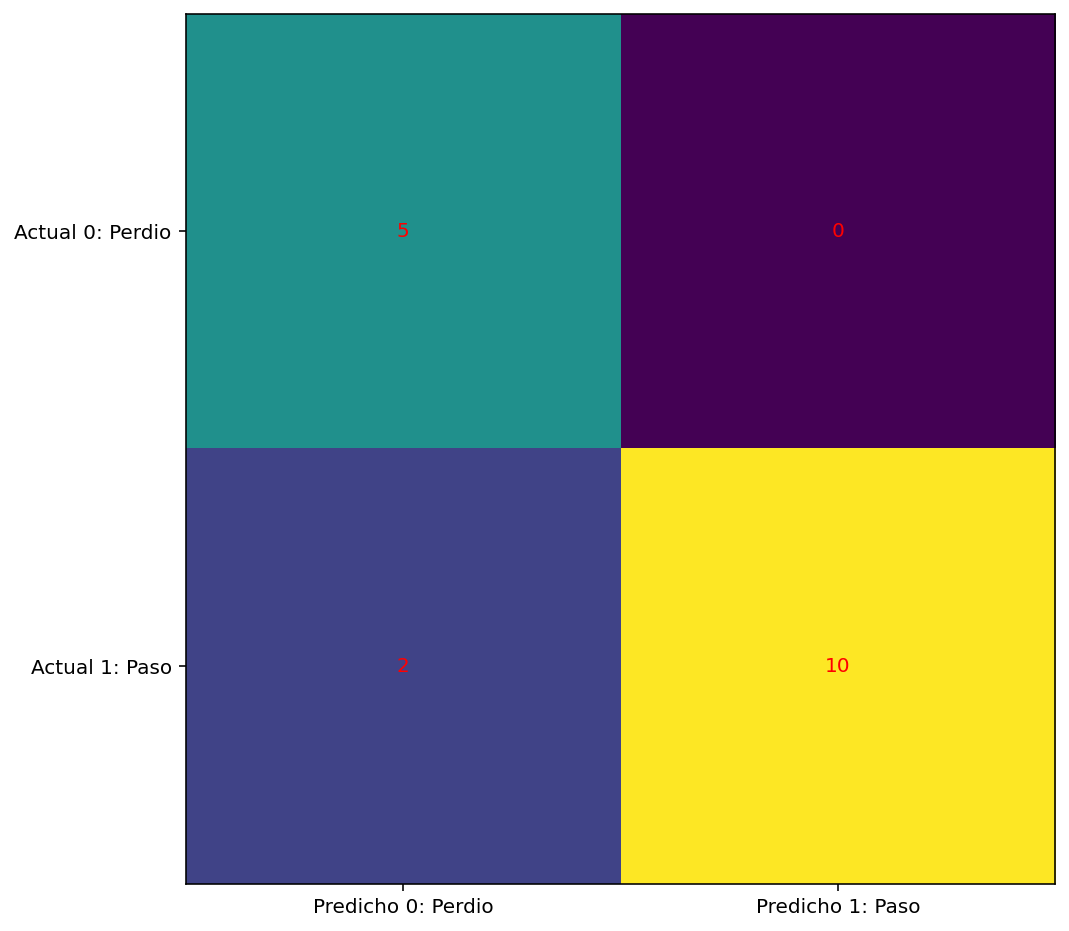

In [13]:
# Matriz de confusion
cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [14]:
# Reporte de precision del modelo KNN:
print(classification_report(Y_test,Y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.83      0.91        12

    accuracy                           0.88        17
   macro avg       0.86      0.92      0.87        17
weighted avg       0.92      0.88      0.89        17



# Conclusion de modelos KNN y KMC a partir de estudiantes con resultados buenos y malos
Los puntajes Elbow score y Silhouette score mostraron que 2 clusters es el mejor valor para hacer la clasificación de los datos. Como esta clasificación tiene en cuenta tanto las notas buenas como las malas se va a examinar ahora como fue la clasificación para los resultados malos y como se puede mejorar estas clasificaciones.

## Clasificador Bayesiano

* *Probabilidad Condicional* : $P(Pase \ algo | dado \ que \ paso \ algo)$
* *Probabilidad a Priori*: Probabilidad de un caso dividido por el numero total de casos.

**Definición**

Dado un conjunto de clasificaciones mutualmente exclusivo y exhaustivo de classificaciones $c_1,c_2,c_k$, las cuales poseen probabilidades a priori $P(c_1),P(c_2),...,P(c_k)$ respectivamente, y $n$ atributos $a_1,a_2,...,a_n$ para los cuales dada una instancia(record/registro) posee valores $v_1,v_2,...,v_n$ respectivamente, la probabilidad posterior de la clase $c_i$ que ocurre para la estancia especificad puede ser mostrada proporcionalmente a :

\begin{equation*}
    P(c_i) \times P(a_1=v_1 \ y \ a_2=v_2... \ y \ a_n=v_n|c_i)
\end{equation*}

Suponiendo que la probabilidad de los atributos son independientes (Generalmente no pasa, pero sigue funcionando), el valor de esta expresión puede ser calculado utilizando el producto.
\begin{equation*}
    P(c_i) \times P(a_1=v_1|c_i) \times P(a_2=v_2|c_i) \times P(a_3=v_3|c_i) \times P(a_3=v_3|c_i) \times
\end{equation*}

Se calcula este producto por cada valor de $i \in [k]$ (Es decir cada clase) y se elige la clasificacion que posee el valor mas grande.

__________________________________________________________________________

Esta ultima expresión es escrita aveces como $P(C_i)\times \prod_{j=1}^n P(a_j=v_j | class =c_i)$. La suma de estas probabilidades no da 1, sin embargo se puede nomr

In [15]:
materia["Nota_final"]

66     3.905
67     4.040
68     4.305
69     3.560
70     2.815
       ...  
127    2.395
128    2.505
129    2.630
130    2.500
131    2.670
Name: Nota_final, Length: 66, dtype: float64

In [16]:
X = materia[["Nota_1er_Corte"]]
Y= materia["Paso"]

In [17]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


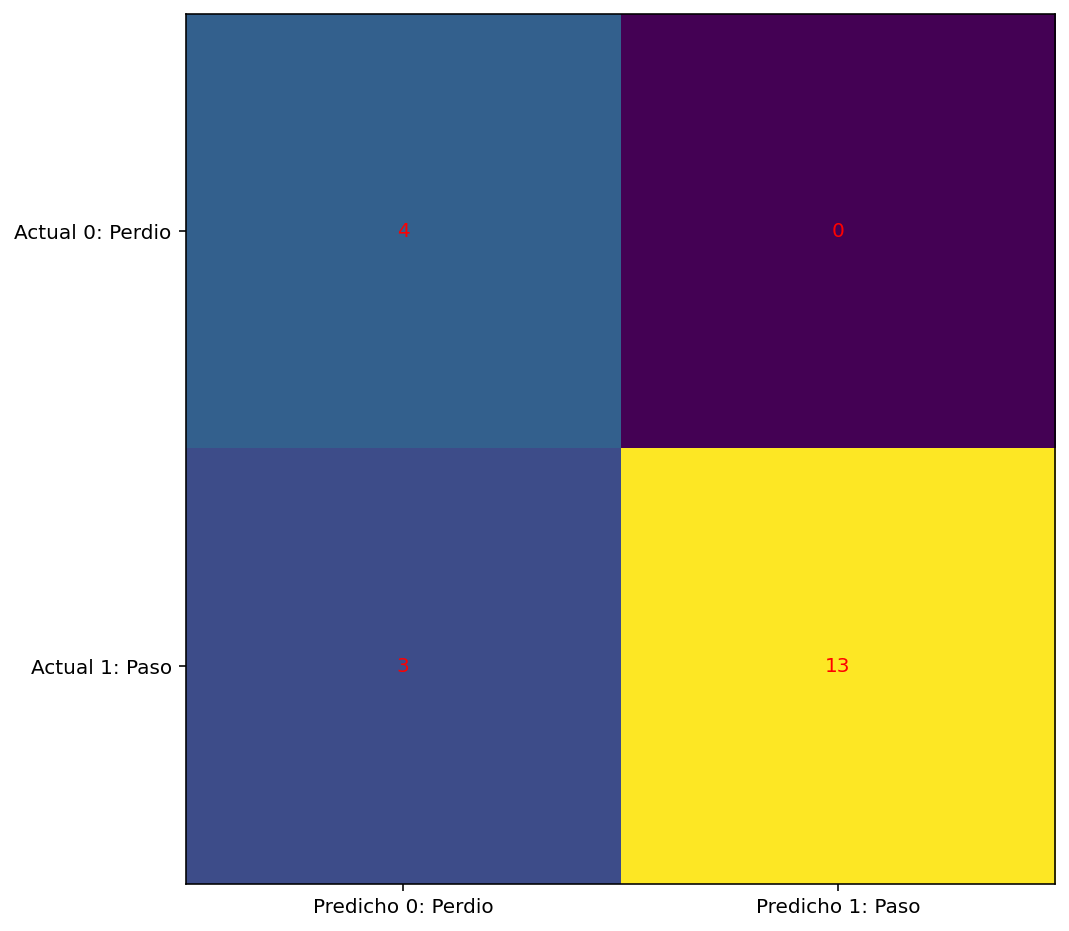

In [18]:
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Regresion Logistica

La regresión logitica trabaja con posibilidades en vez de proporciones. Las posibilidades es simplemente la division/radio de proporción de los dos posibles resultados. Si $p$ es la proporcion de un resultado y $1-p$ la proporción del segundo resultado:

\begin{equation*}
    posibilidades = \frac{p}{1-p}
\end{equation*}

La regresión logistica modela las posibilidades en terminos de variables explicativas. Es decir:

\begin{equation*}
    log(\frac{p}{1-p}) = B_0+B_1x
\end{equation*}

Las probabilidades son estimadas con la función sigmoide $p(x)=\frac{1}{1+exp(-f(x_1,x_2))}$

In [19]:
model = LogisticRegression(solver='liblinear')

In [20]:
result = model.fit(X_train,y_train)

In [21]:
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


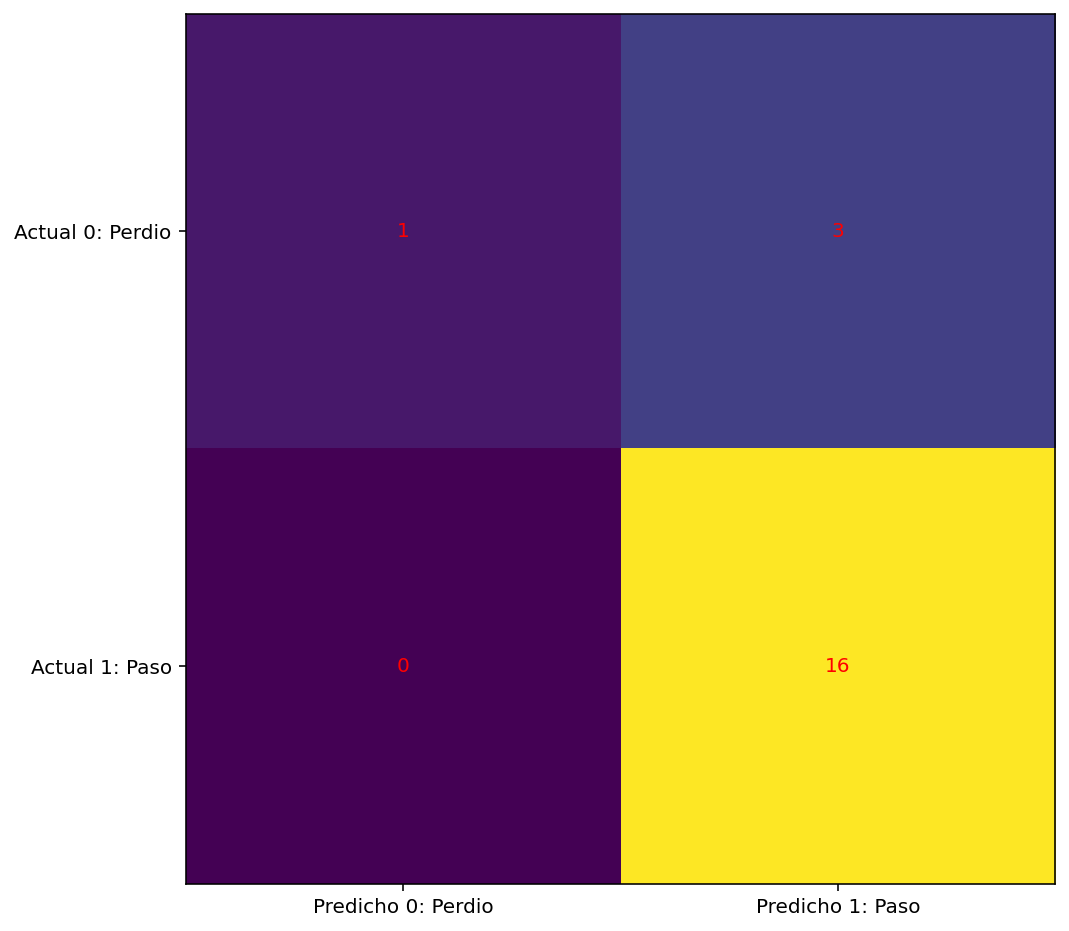

In [22]:
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [23]:
confusion_matrix(y_test,y_pred)

array([[ 1,  3],
       [ 0, 16]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.84      1.00      0.91        16

    accuracy                           0.85        20
   macro avg       0.92      0.62      0.66        20
weighted avg       0.87      0.85      0.81        20



## Decision Tree
Un árbol de decisión es una árbol en la que cada nodo interno representa un "test" de un atributo. Cada rama representa el resultado del test y cada hoja del árbol representa una etiqueta de un grupo. Los caminos desde la raíz hasta la as hojas representan las reglas de clasificación.

In [25]:
# Separating train data and split data
X_train, X_test, y_train, y_test = train_test_split(X,my_labels,test_size = 0.3, random_state = 100)

In [26]:
# Creating the classifier object
tree_clf = DecisionTreeClassifier(criterion = "gini",max_depth = 10,min_samples_leaf=5)

In [27]:
# Performing training
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
# Prediction on test with giniIndex
y_pred = tree_clf.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [29]:
# Calculations of accuracy

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Accuracy score of the model
print("Accuracy: ",accuracy_score(y_test,y_pred))
# Reporte
print(classification_report(y_test, y_pred))

Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.93      0.82      0.87        17

    accuracy                           0.80        20
   macro avg       0.67      0.75      0.69        20
weighted avg       0.85      0.80      0.82        20



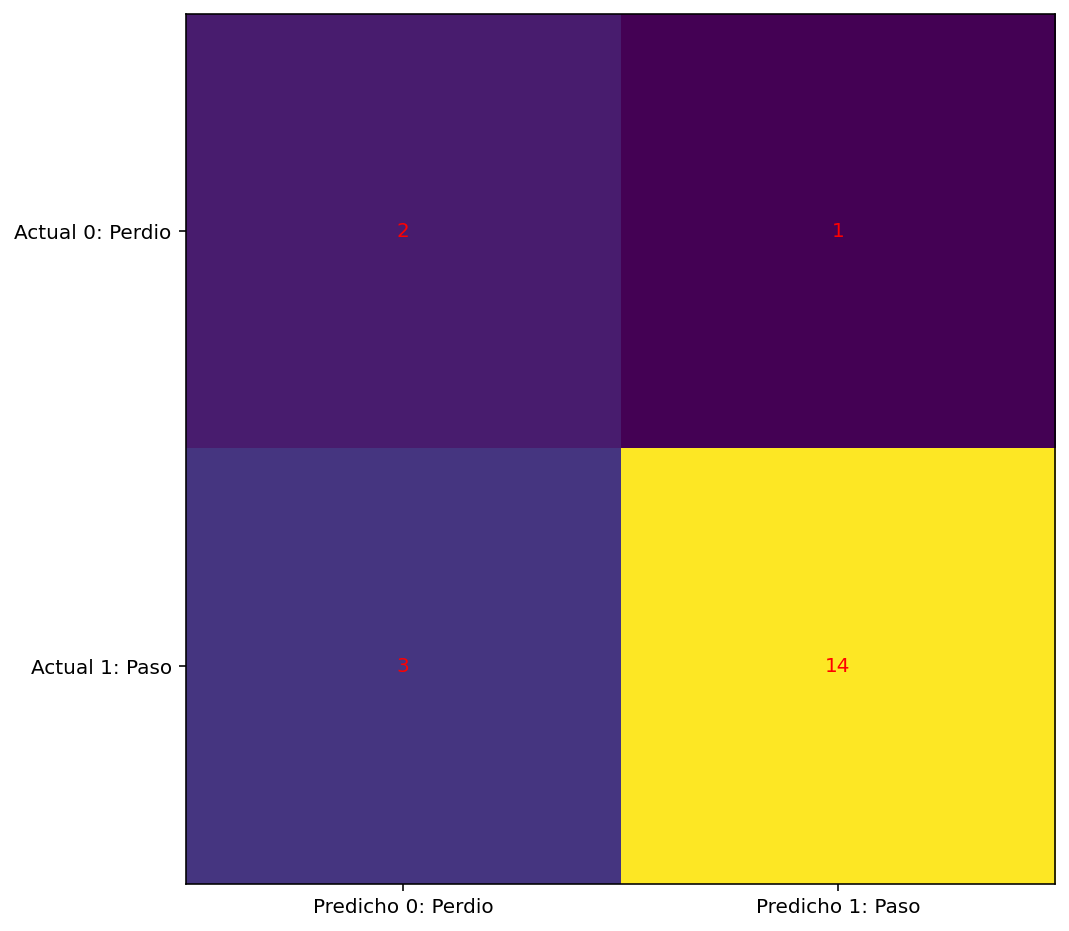

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from math import log

def calculateEntropy(dataSet):
    number = len(dataSet)
    labelCounts = {}
    for featureVector in dataSet:
        currentLabel = featureVector[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] +=1
    entropy = 0
    for i in labelCounts:
        probability = float(labelCounts[keys])/number
        entropy -=probability*log(probability,2)
    return entropy

print(calculateEntropy(X))
data = X.to_numpy()
print(entropy(data))

## Medidas de precisión para estudiantes con riesgo de perdida

In [31]:
cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])
cm

array([[ 5,  0],
       [ 2, 10]])

In [32]:
True_posit=cm[0][0]
True_neg=cm[1][1]
False_neg=[1][0]
False_posit=cm[0][1]
Total = True_posit+True_neg+False_neg+False_posit
print(True_posit,True_neg,False_neg,False_posit)

5 10 1 0


Verdaderos Positivos : Estudiantes que perdieron y fueren identificado como en riesgo.

Verdadero Negativos : Estudiantes que pasaron y no fueron identificados como en riesgo.

Falsos negativos (Tipo II error): Es el numero de estudiantes que perdieron el curso y no fueron identificados por los modelos de riesgo.

Falsos positivos (Tipo I error): el numero de estudiantes que pasaron el curso y fueron identificados como en riesgo.


In [33]:
Accuracy = (True_posit+True_neg)/Total
print("Acurracy:" +str(Accuracy))
Accuracy_pass = (True_neg)/(True_neg+False_posit)
print("Acurracy (Pass):" +str(Accuracy_pass))
Accuracy_fail = (True_posit)/(True_posit+False_neg)
print("Acurracy (Fail):" +str(Accuracy_fail))
F15=((1+1.5*1.5)*True_posit)/((1+1.5*1.5)*True_posit+(1.5*1.5)*False_neg+False_posit)
print("F_{1.5}$:" +str(F15))

Acurracy:0.9375
Acurracy (Pass):1.0
Acurracy (Fail):0.8333333333333334
F_{1.5}$:0.8783783783783784


Accuracy (Pass): Precision de los estudiantes que pasaron.

Accuracy (Fail): Precision de los estudiantes que fallaron.

$F_{1.5}$ : Puntaje que mida la combinacion de las dos precisiones dandole mas peso a los estudiantes que perdieron.

## Support Vector Machine (SVM)
Es un algoritmo de aprendizaje supervisado, que busca construir el mejor hiperplano que separe grupos de datos. Este clasificador puede ser lineal o no lineal.
En algunos casos, construir el hiperplano de separación no es tan fácil por lo que se usa un truco con kernels (transformaciones) que permiten aumentar la dimensión de los datos para.
Existen varios tipos de kernels para los SVM. Entre los más usados se encuentran:
* Kernels lineales: 
* Kernels polinómicos:
* Kernel de función de base radial:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,my_labels,test_size=0.3)

In [35]:
# Se inicia el clasificadores SVM
# NOTA: revisar significado de parametro C y ver como seleccionarlo
cls_lin = svm.SVC(kernel="linear")
cls_poly = svm.SVC(kernel="poly")
cls_rbf = svm.SVC(kernel='rbf')

In [36]:
# training the models
cls_lin.fit(X_train,y_train)
cls_poly.fit(X_train,y_train)
cls_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
# Predict the rsponse
pred_lin = cls_lin.predict(X_test)
print("Accuracy lin_SVM: ",accuracy_score(y_test,pred_lin))
#print("Precision lin_SVM:",y_test,pred_lin)
#
pred_poly = cls_poly.predict(X_test)
print("Accuracy poly_SVM: ",accuracy_score(y_test,pred_poly))
#print("Precision poly_SVM:",y_test,pred_poly)
#
pred_rbf = cls_rbf.predict(X_test)
print("Accuracy rbf_SVM: ",accuracy_score(y_test,pred_rbf))
#print("Precision rbf_SVM:",y_test,pred_rbf)

Accuracy lin_SVM:  0.95
Accuracy poly_SVM:  0.95
Accuracy rbf_SVM:  0.95


Si se aumenta el valor del parametro C la accuracy de los modelos cambia y converge al mismo valor.

In [38]:
# Matrices de confusion
cm_lin = confusion_matrix(y_test,pred_lin, labels=[0,1])
cm_poly = confusion_matrix(y_test,pred_poly, labels=[0,1])
cm_rbf = confusion_matrix(y_test, pred_rbf, labels=[0,1])
# Reportes de clasificacion
print("Reporte linear SVM:")
print(classification_report(y_test,pred_lin))
#
print("Reporte polinomial SVM:")
print(classification_report(y_test,pred_lin))
#
print("Reporte SVM con kernel RBF:")
print(classification_report(y_test,pred_lin))

Reporte linear SVM:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20

Reporte polinomial SVM:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20

Reporte SVM con kernel RBF:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
we

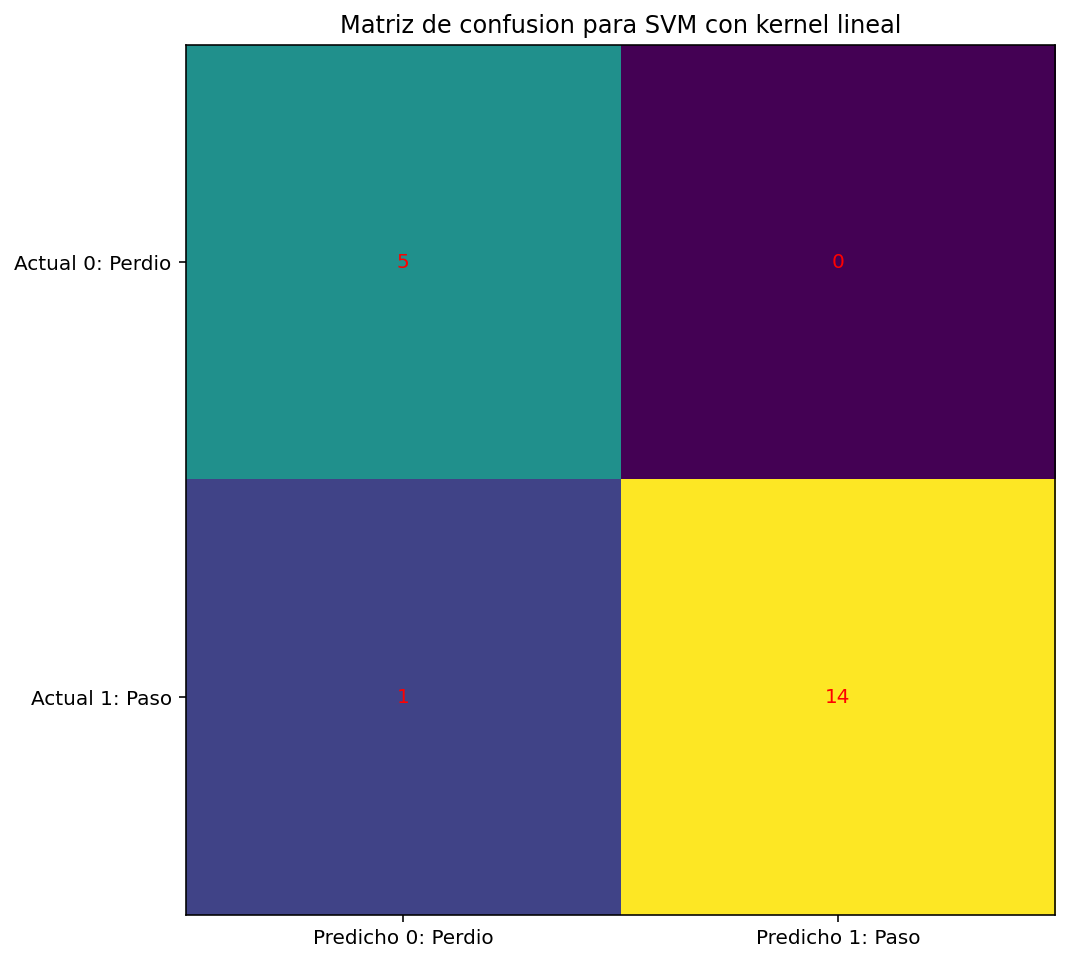

In [39]:
# Grafica para SVM lineal
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lin[i, j], ha='center', va='center', color='red')
plt.title("Matriz de confusion para SVM con kernel lineal")
plt.show()

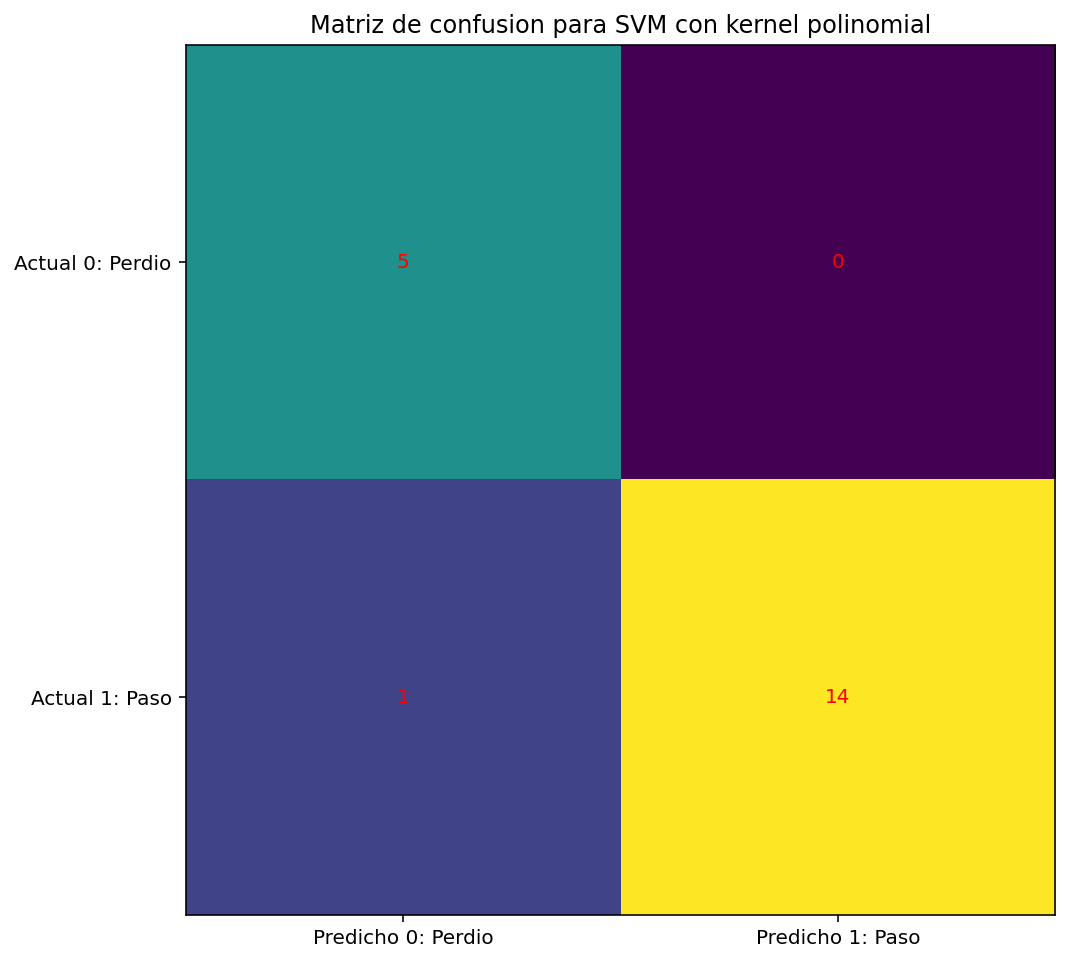

In [40]:
# Grafica para SVM con kernel polinomial
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_poly[i, j], ha='center', va='center', color='red')
plt.title("Matriz de confusion para SVM con kernel polinomial")
plt.show()

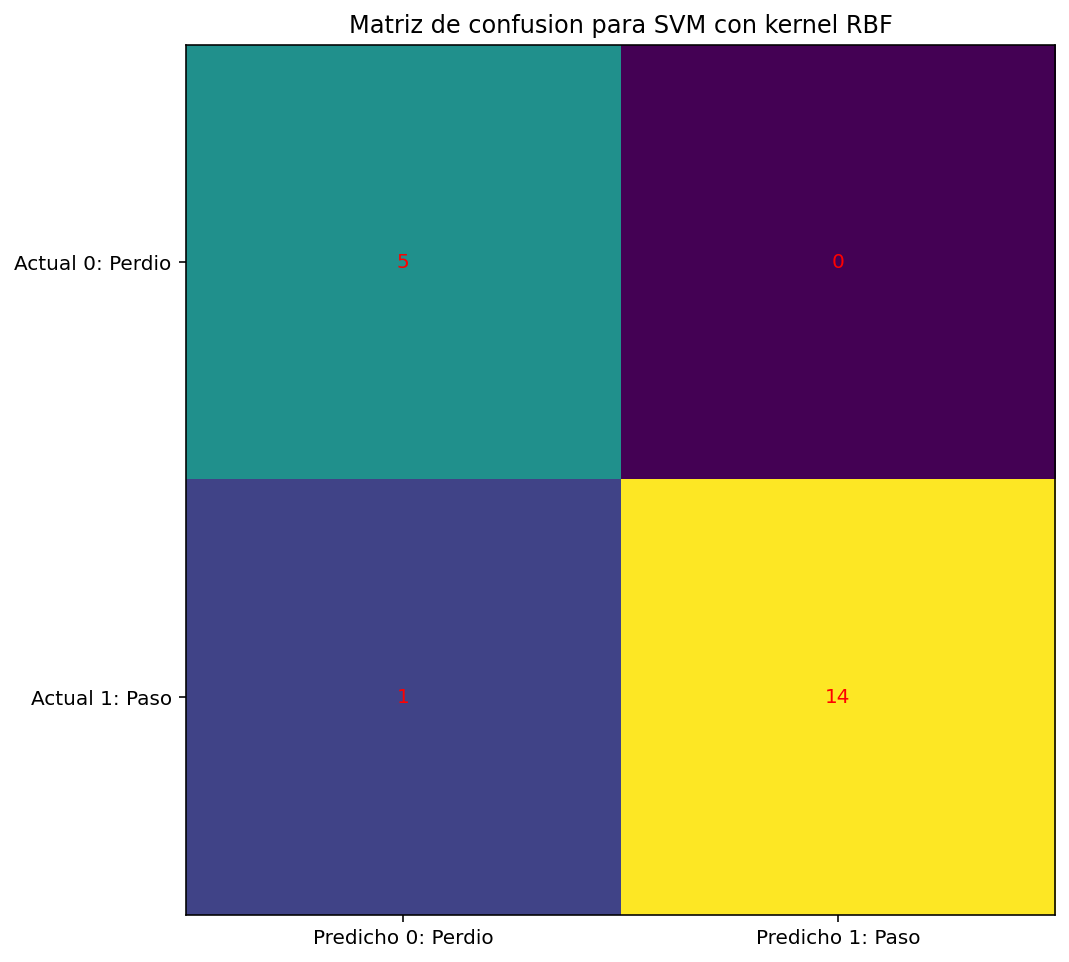

In [41]:
# Grafica para SVM con kernel RBF
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicho 0: Perdio', 'Predicho 1: Paso'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0: Perdio', 'Actual 1: Paso'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rbf[i, j], ha='center', va='center', color='red')
plt.title("Matriz de confusion para SVM con kernel RBF")
plt.show()

## Modelo por materia - cortes

In [42]:
notas = pd.read_csv("datos_notas_macc_cortes_historico_20172_20201.csv",encoding='utf-8',header=0,sep=";")
notas

,Nombre Asignatura,Nota 1er Corte,Nota 2do Corte,Nota 3er Corte,Nota 4to Corte,Nota 5to Corte
0,¿CÓMO MONTAR UN EVENTO Y NO MORIR EN EL INTENTO?,4.7,3.4,4.1,NaN,NaN
1,¿CÓMO MONTAR UN EVENTO Y NO MORIR EN EL INTENTO?,4.7,4.6,4.8,NaN,NaN
2,¿CÓMO MONTAR UN EVENTO Y NO MORIR EN EL INTENTO?,5.0,5.0,4.8,NaN,NaN
3,¿CÓMO MONTAR UN EVENTO Y NO MORIR EN EL INTENTO?,4.7,3.9,4.1,NaN,NaN
4,ACTIVIDAD FÍSICA,4.2,4.7,4.4,NaN,NaN
...,...,...,...,...,...,...
2832,VARIABLE COMPLEJA,4.3,4.9,4.9,5.0,4.6
2833,VARIABLE COMPLEJA,3.4,4.7,5.0,3.0,4.2
2834,VARIABLE COMPLEJA,3.2,4.5,3.3,2.9,3.9
2835,VARIABLE COMPLEJA,3.0,4.3,4.8,4.1,4.7


In [43]:
# Eliminar Nans
notas = notas.dropna()
#notas

In [44]:
#Agregando nota final para predicción:
notas["Notas Final"]= notas.apply(lambda row: (row["Nota 1er Corte"]+row["Nota 2do Corte"]+row["Nota 3er Corte"]+row["Nota 4to Corte"]+row["Nota 5to Corte"])/5,axis=1)
notas

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Nombre Asignatura,Nota 1er Corte,Nota 2do Corte,Nota 3er Corte,Nota 4to Corte,Nota 5to Corte,Notas Final
17,ÁLGEBRA ABSTRACTA Y CODIFICACIÓN,2.6,3.9,4.6,2.9,3.4,3.48
18,ÁLGEBRA ABSTRACTA Y CODIFICACIÓN,3.3,3.7,5.0,4.5,3.1,3.92
19,ÁLGEBRA ABSTRACTA Y CODIFICACIÓN,4.1,5.0,4.3,4.6,4.6,4.52
20,ÁLGEBRA ABSTRACTA Y CODIFICACIÓN,4.8,4.8,4.8,5.0,3.5,4.58
21,ÁLGEBRA ABSTRACTA Y CODIFICACIÓN,2.8,1.4,3.3,4.3,2.8,2.92
...,...,...,...,...,...,...,...
2831,VARIABLE COMPLEJA,2.4,3.4,4.1,2.6,4.4,3.38
2832,VARIABLE COMPLEJA,4.3,4.9,4.9,5.0,4.6,4.74
2833,VARIABLE COMPLEJA,3.4,4.7,5.0,3.0,4.2,4.06
2834,VARIABLE COMPLEJA,3.2,4.5,3.3,2.9,3.9,3.56


In [45]:
def funcion_paso(x):
    #x nota final
    #return si paso o perdio como etiquetas para modelos de predicción
    if(x >= 3):
        return 1
    elif(x <3):
        return 0

In [46]:
notas["Paso"] = notas.apply(lambda row: funcion_paso(row["Notas Final"]),axis=1 )

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [60]:
nombre_materia = "ELEMENTOS DE FÍSICA"
materia = notas[notas["Nombre Asignatura"] == nombre_materia]
materia

,Nombre Asignatura,Nota 1er Corte,Nota 2do Corte,Nota 3er Corte,Nota 4to Corte,Nota 5to Corte,Notas Final,Paso
1472,ELEMENTOS DE FÍSICA,3.3,4.2,1.5,3.9,4.5,3.48,1
1473,ELEMENTOS DE FÍSICA,4.9,3.7,2.2,4.4,5.0,4.04,1
1474,ELEMENTOS DE FÍSICA,3.0,3.7,2.9,0.0,5.0,2.92,0
1475,ELEMENTOS DE FÍSICA,1.0,5.0,3.5,3.0,4.0,3.30,1
1476,ELEMENTOS DE FÍSICA,2.5,5.0,3.5,3.5,4.0,3.70,1
1477,ELEMENTOS DE FÍSICA,3.0,5.0,4.0,2.2,3.0,3.44,1
1478,ELEMENTOS DE FÍSICA,4.5,4.2,2.5,4.5,4.5,4.04,1
1479,ELEMENTOS DE FÍSICA,4.1,5.0,5.0,4.2,4.4,4.54,1
1480,ELEMENTOS DE FÍSICA,3.2,4.7,3.2,4.3,2.1,3.50,1
1481,ELEMENTOS DE FÍSICA,2.7,3.7,4.2,4.4,4.8,3.96,1


In [61]:
X = materia[["Nota 1er Corte","Nota 2do Corte"]]
Y = materia[["Paso"]]
Y["Paso"].nunique()==1 # Codigo para saber si solo posee una clase de prediccion o dos

False

In [49]:
lista_modelos =[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
# Clasificarod K- Vecinos, Clasificador Bayesiano, Regresion Logistica, Arbol de decisión
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Seleccion de mejor modelo para la materia

In [50]:
def mejor_modelo_general(materia):
    X = materia[["Nota 1er Corte","Nota 2do Corte"]]
    Y = materia[["Paso"]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    mejor_modelo = lista_modelos[0] #Inicializando para eleccion de modelo
    F15_mejor_modelo = 0 # Inicializando puntaje F.15, el cual es el que nos vamos a basar para la elección del modelo
    for i in range(len(lista_modelos)):
        modelo = lista_modelos[i]
        modelo.fit(X_train,Y_train)
        Y_pred = modelo.predict(X_test)
        cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])
        True_posit=cm[0][0]
        True_neg=cm[1][1]
        False_neg=[1][0]
        False_posit=cm[0][1]
        Total = True_posit+True_neg+False_neg+False_posit
        Accuracy = (True_posit+True_neg)/Total
        Accuracy_pass = (True_neg)/(True_neg+False_posit)
        Accuracy_fail = (True_posit)/(True_posit+False_neg)
        F15=((1+1.5*1.5)*True_posit)/((1+1.5*1.5)*True_posit+(1.5*1.5)*False_neg+False_posit)

        if F15 > F15_mejor_modelo:
            F15_mejor_modelo = F15
            mejor_modelo = modelo

        print(r"F_{1.5}$:" +str(F15))
    return mejor_modelo,F15_mejor_modelo

In [78]:
def mejor_modelo(materia,modelo_general):
    X = materia[["Nota 1er Corte","Nota 2do Corte"]]
    Y = materia[["Paso"]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    if Y_train["Paso"].nunique()==1: # Codigo para saber si solo posee una clase de prediccion o dos
        Y_pred = modelo_general.predict(X_test)
        cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])
        True_posit=cm[0][0]
        True_neg=cm[1][1]
        False_neg=[1][0]
        False_posit=cm[0][1]
        Total = True_posit+True_neg+False_neg+False_posit
        Accuracy = (True_posit+True_neg)/Total
        Accuracy_pass = (True_neg)/(True_neg+False_posit)
        Accuracy_fail = (True_posit)/(True_posit+False_neg)
        F15=((1+1.5*1.5)*True_posit)/((1+1.5*1.5)*True_posit+(1.5*1.5)*False_neg+False_posit)
        return modelo_general,F15
    else:
        mejor_modelo = lista_modelos[0] #Inicializando para eleccion de modelo
        F15_mejor_modelo = 0 # Inicializando puntaje F.15, el cual es el que nos vamos a basar para la elección del modelo
        for i in range(len(lista_modelos)):
            modelo = lista_modelos[i]
            modelo.fit(X_train,Y_train)
            Y_pred = modelo.predict(X_test)
            cm = confusion_matrix(Y_test,Y_pred,labels = [0, 1])
            True_posit=cm[0][0]
            True_neg=cm[1][1]
            False_neg=[1][0]
            False_posit=cm[0][1]
            Total = True_posit+True_neg+False_neg+False_posit
            Accuracy = (True_posit+True_neg)/Total
            Accuracy_pass = (True_neg)/(True_neg+False_posit)
            Accuracy_fail = (True_posit)/(True_posit+False_neg)
            F15=((1+1.5*1.5)*True_posit)/((1+1.5*1.5)*True_posit+(1.5*1.5)*False_neg+False_posit)

            if F15 > F15_mejor_modelo:
                F15_mejor_modelo = F15
                mejor_modelo = modelo

            #print(r"F_{1.5}$:" +str(F15))
        return mejor_modelo,F15_mejor_modelo

SyntaxError: invalid syntax (<ipython-input-78-6cc6a6aa5c7c>, line 4)

## Guardar Modelo en memoria

La idea es que este modelo quede guardado en memoria, de tal manera que se pueda llamar e utilizar para la predicción de la materia correspondiente. Tambien la idea es que una vez pase un semestre se vuelva alimentar el modelo para mejora de predicciones.

In [0]:
def seleccionar_guardar_modelo_general(materia,nombre_materia):
    mejor_modelo1,F15 = mejor_modelo_general(materia)
    #Guardar el modelo en disco
    filename = "modelos/mejor_modelo_"+nombre_materia+".sav"
    pickle.dump(mejor_modelo1, open(filename, 'wb'))
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))

In [79]:
def seleccionar_guardar_modelo(materia,nombre_materia,modelo_general):
    mejor_modelo1,F15 = mejor_modelo(materia,modelo_general)
    #Guardar el modelo en disco
    filename = "modelos/mejor_modelo_"+nombre_materia+".sav"
    pickle.dump(mejor_modelo1, open(filename, 'wb'))
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))

In [80]:
# Para cargar modelo para posterior prediccion
# Y_pred = loaded_model.predict(X_test)
#### LA LINEA DE ARRIBA SIRVE PARA ESO

## Modelo general
Este modelo general se aplicar para aquellas materias que no se pueda crear un modelo propio dado que todos los estudiantes han pasado la materia.

In [81]:
X_general = notas[["Nota 1er Corte","Nota 2do Corte"]]
Y_general = notas[["Paso"]]
seleccionar_guardar_modelo_general(notas,"Modelo_General")
modelo_general,F15_general = mejor_modelo_general(notas)

F_{1.5}$:0.8552631578947368
F_{1.5}$:0.8145780051150895
F_{1.5}$:0.8217446270543616
F_{1.5}$:0.8217446270543616
F_{1.5}$:0.8655980271270037
F_{1.5}$:0.8243064729194187
F_{1.5}$:0.8387096774193549
F_{1.5}$:0.8387096774193549


/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

### Haremos esto para todas las materias
Primero deberemos reconocer cada tipo de materia en la base de datos

In [75]:
materias = pd.DataFrame(notas.groupby("Nombre Asignatura")).reset_index()
materias

,index,0,1
0,0,ALGORITMOS Y ESTRUCTURAS DE DATOS,Nombre Asignatura Nota 1...
1,1,ANÁLISIS ESTADÍSTICO DE DATOS,Nombre Asignatura Nota 1er C...
2,2,ANÁLISIS NUMÉRICO Y COMPUTACIÓN CIENTÍFICA,Nombre Asignatur...
3,3,ANÁLISIS REAL,Nombre Asignatura Nota 1er Corte Nota 2d...
4,4,ARQUITECTURA DEL COMPUTADOR,Nombre Asignatura Nota 1er Cor...
5,5,CIBERSEGURIDAD,Nombre Asignatura Nota 1er Corte Nota 2...
6,6,"COMPUTACIÓN PARALELA, CONCURRENTE Y DISTRIBUIDA",Nombre Asi...
7,7,CÁLCULO 1,Nombre Asignatura Nota 1er Corte Nota 2d...
8,8,CÁLCULO 2,Nombre Asignatura Nota 1er Corte Nota 2d...
9,9,CÁLCULO 3,Nombre Asignatura Nota 1er Corte Nota 2...


In [76]:
lista_materias = []
for index,row in materias.iterrows():
    lista_materias.append(row[0])
lista_materias

['ALGORITMOS Y ESTRUCTURAS DE DATOS',
 'ANÁLISIS ESTADÍSTICO DE DATOS',
 'ANÁLISIS NUMÉRICO Y COMPUTACIÓN CIENTÍFICA',
 'ANÁLISIS REAL',
 'ARQUITECTURA DEL COMPUTADOR',
 'CIBERSEGURIDAD',
 'COMPUTACIÓN PARALELA, CONCURRENTE Y DISTRIBUIDA',
 'CÁLCULO 1',
 'CÁLCULO 2',
 'CÁLCULO 3',
 'ECUACIONES DIFERENCIALES',
 'ECUACIONES DIFERENCIALES PARCIALES',
 'ELECTIVA DESARROLLO WEB',
 'ELECTIVA HACKING ÉTICO',
 'ELEMENTOS DE FÍSICA',
 'ESTADÍSTICA',
 'GEOMETRÍA COMPUTACIONAL Y DIFERENCIAL 1',
 'INTRODUCCIÓN A LA REVOLUCIÓN 4.0',
 'LÓGICA Y MATEMÁTICAS DISCRETAS',
 'LÓGICA, TEORÍA DE NÚMEROS Y CONJUNTOS',
 'MANEJO DE BASES DE DATOS',
 'MODELACIÓN DE SISTEMAS DINÁMICOS',
 'MODELACIÓN DE SISTEMAS EN CIENCIAS NATURALES',
 'OPTIMIZACIÓN',
 'PENSAMIENTO MATEMÁTICO',
 'PRECÁLCULO',
 'PROBABILIDAD',
 'PROCESAMIENTO DE SEÑALES',
 'PROGRAMACIÓN DE COMPUTADORES',
 'REDES DE COMPUTADORES',
 'TEORÍA DE GRAFOS',
 'TEORÍA DE LA COMPUTACIÓN',
 'TOPOLOGÍA',
 'VARIABLE COMPLEJA',
 'ÁLGEBRA ABSTRACTA Y CODIFICACI

In [77]:
for i in range(len(lista_materias)):
    nombre_materia = lista_materias[i]
    materia = notas[notas["Nombre Asignatura"] == nombre_materia]
    print(nombre_materia)
    seleccionar_guardar_modelo(materia,nombre_materia,modelo_general)

ALGORITMOS Y ESTRUCTURAS DE DATOS
ANÁLISIS ESTADÍSTICO DE DATOS
ANÁLISIS NUMÉRICO Y COMPUTACIÓN CIENTÍFICA
ANÁLISIS REAL
ARQUITECTURA DEL COMPUTADOR
CIBERSEGURIDAD
COMPUTACIÓN PARALELA, CONCURRENTE Y DISTRIBUIDA
CÁLCULO 1
CÁLCULO 2
CÁLCULO 3
ECUACIONES DIFERENCIALES
ECUACIONES DIFERENCIALES PARCIALES
ELECTIVA DESARROLLO WEB
ELECTIVA HACKING ÉTICO


/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

ELEMENTOS DE FÍSICA
ESTADÍSTICA
GEOMETRÍA COMPUTACIONAL Y DIFERENCIAL 1
INTRODUCCIÓN A LA REVOLUCIÓN 4.0
LÓGICA Y MATEMÁTICAS DISCRETAS


/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/ext/anaconda-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## ¡ FALTA HACER MODELOS ENSEMBLE !